# 作文批改实操

<span style="font-size: 20px; font-weight: bold;">注意：您使用该案例默认的数据和模型训练时，会产生一定费用。计费方式参考：https://cloud.baidu.com/doc/WENXINWORKSHOP/s/6lrk4bgxb</span>

在教育场景中，对于学生作文，通常我们会从作文的内容是否符合题意、作文结构是否严谨、作文是否存在缺点和扣分项等方面，对我们的作文做出评判，并给我们打出最终的得分，这属于偏主观的打分，比较耗费老师的精力。而在大模型时代，大模型也可以成为一名作文点评专家。大模型有很好的格式遵循和风格遵循能力，我们将点评的要求或者模板"调教"给大模型，大模型就能按照我们的要求对一篇作文做出点评和打分。

众所周知，高考作文批改是由两位老师一起完成的，每篇作文花大概30秒到2分钟不等，因此对于高中作文大模型打分，既要追求效率，又要追求性能和成本。

下面我们将结合百度智能云千帆ModelBuilder平台（下面简称：千帆平台） SDK 运行代码的方式，找到给作文打分的大模型最优解。作文批改大模型，即可以成为老师的得力助手，也能够让学生知道作文还可以从哪些方面提升，大大节省老师批改的成本和时间。

# 0. 环境准备

在此部分，我们将讨论使用千帆平台进行推理任务之前的准备工作。这包括获取访问权限、安装 SDK 等内容。

然后通过如下方式设置鉴权所需的 Access Key 和 Secret Key，相关 Key 可以从 [百度智能云控制台 - 安全认证](https://console.bce.baidu.com/iam/#/iam/accesslist) 页面获得。

In [ ]:
!pip install -U qianfan>=0.3.8.2 qianfan[local_data_clean]

In [ ]:
import os

# 这里请根据 SDK 文档获取自己的 access key 和 secret key
os.environ["QIANFAN_ACCESS_KEY"] = "your_qianfan_console_access_key"
os.environ["QIANFAN_SECRET_KEY"] = "your_qianfan_console_secret_key"

# 1. 大模型推理调用

初探通用大模型作文批改能力，我们从网上找到高考作文的题目，对应的范文，以及评分规则入手，一步步调用大模型激发其能力。

* 题目：[2023年 全国甲卷作文真题](https://easylearn.baidu.com/edu-page/college/composition/analysis?testType=%E5%85%A8%E5%9B%BD%E7%94%B2%E5%8D%B7&year=2023)
* 范文：[我的世界大于这世界](https://easylearn.baidu.com/edu-page/college/composition/detail?id=qgAR%2BsJyVkxHL9IwvSY97g%3D%3D&testType=%E5%85%A8%E5%9B%BD%E7%94%B2%E5%8D%B7&year=2023)





## 1.1 Prompt 初探（尝试到优化）


本节将介绍如何从用户提供的简单 prompt 出发，构建一个基本的推理任务。我们将演示如何使用千帆 SDK 调用大模型以获取模型推理的结果。

作文上，准备了两份数据：高考范文和偏离主题作文。

In [1]:
import qianfan
from qianfan import ChatCompletion, Completion
from qianfan.common import Prompt

prompt = Prompt("请帮我批改如下高考作文，给出评价和评分（0-60分）：\n题目：{question}\n作文内容：{article}")
target = {
    "question": "人们因技术发展得以更好地掌控时间，但也有人因此成了时间的仆人。这句话引发了你怎样的联想与思考？请写一篇文章。要求：选准角度，确定立意，明确文体，自拟标题；不要套作，不得抄袭；不得泄露个人信息；不少于800字。",
    "article": """
我的世界大于这世界
我们消磨时间，也悔恨虚度了时间。在新时代的技术潮流中，当我们学会了用充满科技感的软件感受大千世界，便开始用无限的信息充斥着所有时间——浏览新鲜事儿，刷刷直播视频，关注好友动态……直到耗尽睡前的全部精力。当我们想要获得更多，便开始想尽办法“抢先”“争先”，不断被向前驱赶。
可是，我们的世界不止有这些，我们还可以去欣赏“江间波浪兼天涌，塞上风云接地阴”的壮阔，还可以去感受“揉碎在浮躁间，沉淀着彩虹似的梦”的温柔，更可以来一场“携手藕花湖上路，一霎黄梅细雨”的闲庭信步。只有当我们做了时间的主人才更能体会——我的世界，大于这世界。
时不重至，华不再阳。只有做时间的朋友，才能拥有有意义的人生，创造更有价值的事业。55岁的翟志刚，一直都和所有航天员一样，进行着日复一日的训练。13年间，他先后成为神舟十号和神舟十二号任务的备份航天员。“把结果交给时间，不虚度时间”，让他把梦想放飞在了太空。在北京冬奥会上，谷爱凌流畅的滑线感动了世界，这名18岁的姑娘在接受多家媒体采访时，都曾讲述过在车上写作业，甚至在训练和学业同样繁忙时仍能保持很长睡眠时间的故事。“珍惜时间，合理规划时间”，让她用热爱把冰雪融化。
现如今，技术的进步，正在提高人们利用时间的效率，互联网拉进了人们彼此之间的距离。通过聊天软件，我们可以随时获取信息和交流。过去，一封信是车马慢慢，递送到亲人的手里；现在，邮件秒达在同事的邮箱；功能丰富的购物平台，让买卖的时间大大缩短，人们不再需要通过“逛街”耗费时间和精力；于我们学生来说，在线教育，使得我们可以在自己的时间和节奏下，学习新的技能和知识……通过技术省力省时的现象，在我们身边不胜枚举。
然而，技术是把双刃剑，它让我们对时间的控制越来越精准、自信，同时，也让我们逐渐模糊了时间的概念，我们开始漫无目的地趴在“网”上，消耗时光。再如“节点”“抢先”，也让我们对时间的把控失了味儿。可如果只为达到“节点”，就不会拥有太空漫步的本领，最后只能与梦想擦肩；假如只为一时“抢先”，就不会有一手提着雪板，一手拿着食物走入赛场的从容。我们可以拥抱技术，用时间工具更好地为我们服务，让技术为生活增香添色。但是，我们不要让“科技”、让“时限”，无孔不入包围我们的生活，失去张弛有度的人生。
总之，在通过技术精确利用时间的同时，我们不要愈发深入地陷在时间的束缚和催促下。只有汲取科技的力量，善用时间，才能感受生活的美好，延展自我的世界。正如杜牧所言：“浮生若梦冰如水，日夜东流人不知。”韶华易逝，我们能做的就是在有限的生命长度里拓宽自己无限的宽度和深度。这样，我的世界便大于这世界。
    """,
    "expect": '{"详细解析": {"内容项": {"解析": "文章围绕技术发展对人们时间观念的影响进行了深入的思考和讨论，立意明确，中心突出，内容充实，思想健康，感情真挚。作者通过列举翟志刚和谷爱凌的事例，以及现代科技带来的便利和负面影响，阐述了做时间主人的重要性，并提出了在利用科技的同时，也要善用时间，拓宽生命宽度的观点。整篇文章逻辑清晰，论述有力，符合题意。", "等级": "一等", "得分": "20分"}, "表达项": {"解析": "文章采用议论文的文体，结构严谨，语言流畅，字迹工整，符合文体要求。作者在论述过程中运用了多种论证方法，如举例论证、对比论证等，使文章更具说服力。同时，作者还引用了一些诗句和名言，增加了文章的文采和深度。", "等级": "一等", "得分": "20分"}, "发展等级": {"解析": "文章在立意、内容和表达等方面都表现出较高的水平，尤其是在思想深度和文采方面，作者通过深入的思考和精心的表达，使文章具有了一定的创意和启发性。因此，本文在发展等级方面也可以给予较高的评价。", "等级": "一等", "得分": "20分"}, "扣分项和残篇评定": {"解析": "文章在字数、标题、错别字、标点符号等方面都没有明显的问题，因此不需要扣分。同时，文章也不是残篇，结构完整，论述充分。", "扣分": "0分"}}, "缺点和改进意见": {"缺点": "虽然文章整体表现优秀，但在一些细节方面还可以进一步完善。例如，部分论据的阐述可以更加具体和生动，以增加读者的阅读兴趣和理解深度；另外，个别句子的表达可以更加精炼和准确，以提高文章的整体质量。", "改进意见": "作者可以在今后的写作中注重论据的具体性和生动性，通过描绘更多的细节和场景来增强文章的说服力和感染力；同时，也可以加强对句子表达的锤炼和打磨，力求用更精炼、更准确的语言来表达自己的思想和观点。"}, "最终得分": "60分"}'
}

bad_target = {
    "question": "人们因技术发展得以更好地掌控时间，但也有人因此成了时间的仆人。这句话引发了你怎样的联想与思考？请写一篇文章。要求：选准角度，确定立意，明确文体，自拟标题；不要套作，不得抄袭；不得泄露个人信息；不少于800字。" ,
    "article": """
做网络的主人
随着时代的发展，社会的进步，网络像是一列快车，加速着我们迈进未来的脚步，引领着我们走向瞬息万变的大千世界。
老子说过，一切事物都有正反两面，网络也不例外。“秀才不出门，全知天下事”。坐在电脑前，鼠标轻轻一点，世界近在眼前。优雅的音乐，网上聊天使我们放松心情;奇闻异事，大好河山使我们大开眼界，不出门便走遍大江南北;搞笑的视频使我们的生活增添了几分乐趣;网上购物，读书，使我们的生活变得便捷……网络融入我们的生活，使我们乐在其中!非典”肆虐时期，北京中小学无法正常上课，便开展网上教学，学生们都通过网络在家中上课。多么神奇啊!一根线，一台电脑，既保证了师生们的生命安全，又保证了正常的学习。
网络上有着多于我们书本的知识。因此，我们对网络便产生了依赖，变得懒惰。写作文，不要想，电脑上有抄;做题目，小意思，电脑会告诉我。做作业就像完成任务一样，只要完成就够了。老师为了我们将知识记得更牢固而辛苦布置的作业，我们都顺手抄了，没有记住，离开了电脑我们什么都不会。
网络是把双刃剑，它给予我们思想上的满足，带给我们方便，让我们了解到世界的丰富多彩，同时又让我们沉醉、依赖于它，成了一个个网虫，渐渐因为没有满足而走向违法犯罪。
上网就如同吃饭，会吃的人长精神，不会吃的人长病疽。作为现代人，要有驾驭网络的能力，要充分利用现代科技的先进条件，借网络为已用，化网络为神奇，让生命之舟在网络这个自由海洋里，破激流，越险滩，乘风破浪，鼓帆竞航，奔向理想的彼岸。
“每个人都该承担一定的社会责任，在网上规范言行!”“让网络成为一方净土，从我做起!我们一定要知荣明耻，树网络新风，一句话，网络是我们大家的朋友，需要我们共同维护，我们应当让网络成为我们的朋友，成为我们健康成长的又一个人生舞台。我们应当远离网络的阴暗面，坚决上绿色的网站，做文明的中学生让我们拥有网络吧!它会使你的生活更精彩;让我们拥有网络吧!它会让奔小康的路更宽、更阔!让我们一起呼吁——“绿色上网”!让网络时空绽开文明之花!
    """,
    "expect": ''
}
prompt_r = prompt.render(**bad_target)[0]
print(prompt_r)

请帮我批改如下高考作文，给出评价和评分（0-60分）：
题目：人们因技术发展得以更好地掌控时间，但也有人因此成了时间的仆人。这句话引发了你怎样的联想与思考？请写一篇文章。要求：选准角度，确定立意，明确文体，自拟标题；不要套作，不得抄袭；不得泄露个人信息；不少于800字。
作文内容：
做网络的主人
随着时代的发展，社会的进步，网络像是一列快车，加速着我们迈进未来的脚步，引领着我们走向瞬息万变的大千世界。
老子说过，一切事物都有正反两面，网络也不例外。“秀才不出门，全知天下事”。坐在电脑前，鼠标轻轻一点，世界近在眼前。优雅的音乐，网上聊天使我们放松心情;奇闻异事，大好河山使我们大开眼界，不出门便走遍大江南北;搞笑的视频使我们的生活增添了几分乐趣;网上购物，读书，使我们的生活变得便捷……网络融入我们的生活，使我们乐在其中!非典”肆虐时期，北京中小学无法正常上课，便开展网上教学，学生们都通过网络在家中上课。多么神奇啊!一根线，一台电脑，既保证了师生们的生命安全，又保证了正常的学习。
网络上有着多于我们书本的知识。因此，我们对网络便产生了依赖，变得懒惰。写作文，不要想，电脑上有抄;做题目，小意思，电脑会告诉我。做作业就像完成任务一样，只要完成就够了。老师为了我们将知识记得更牢固而辛苦布置的作业，我们都顺手抄了，没有记住，离开了电脑我们什么都不会。
网络是把双刃剑，它给予我们思想上的满足，带给我们方便，让我们了解到世界的丰富多彩，同时又让我们沉醉、依赖于它，成了一个个网虫，渐渐因为没有满足而走向违法犯罪。
上网就如同吃饭，会吃的人长精神，不会吃的人长病疽。作为现代人，要有驾驭网络的能力，要充分利用现代科技的先进条件，借网络为已用，化网络为神奇，让生命之舟在网络这个自由海洋里，破激流，越险滩，乘风破浪，鼓帆竞航，奔向理想的彼岸。
“每个人都该承担一定的社会责任，在网上规范言行!”“让网络成为一方净土，从我做起!我们一定要知荣明耻，树网络新风，一句话，网络是我们大家的朋友，需要我们共同维护，我们应当让网络成为我们的朋友，成为我们健康成长的又一个人生舞台。我们应当远离网络的阴暗面，坚决上绿色的网站，做文明的中学生让我们拥有网络吧!它会使你的生活更精彩;让我们拥有网络吧!它会让奔小康的路更宽、更阔!让我们一起呼吁——“绿色上网”!让网络时空绽开文明之花!
    


In [2]:
from qianfan import ChatCompletion, Completion

comp = Completion(model="ERNIE-Speed")

result = comp.do(
    prompt=prompt_r,
    stream=True)

for s in result:
    print(s['result'])

[WARNING] [04-16 12:34:05] base.py:406 [t:8211643072]: retry is not available when stream is enabled
[WARNING] [04-16 12:34:05] base.py:621 [t:8211643072]: This key `messages` does not seem to be a parameter that the model `ERNIE-Speed` will accept


作文评价
及评分：

该篇文章围绕“人们因技术发展得以更好地掌控时间，但也有人因此成了时间的仆人”这一主题展开，讨论了网络时代的利弊，
并结合自身观点提出了应对策略。
文章结构清晰，层次分明，从网络的正面影响谈起，逐步深入到网络带来的负面影响，最后提出了如何正确对待网络的建议。
整体上，文章符合高考作文的评分标准。


首先，文章紧扣题目要求，选准角度，立意明确，文体符合规范，自拟了标题。
在内容方面，文章不仅提到了网络带来的便利，还深入探讨了网络依赖和网络犯罪的隐患，思考深入，内容丰富。


其次，文章的语言表达准确，用词恰当，句式变化丰富，符合语言规范。
在逻辑方面，文章条理清晰，段落间逻辑连贯，整体结构严谨。


但是，文章也存在一些不足之处。
一方面，部分句子表达过于繁琐，可以更加简洁明了。
另一方面，虽然文章讨论了网络的负面影响，但对策部分稍显简单，可以进一步展开和深化。


根据以上评价，我给这篇文章一个评分：55分（满分60分）。文章紧扣主题，立意明确，内容丰富，语言表达准确，
逻辑清晰。
但在句子表达和对策部分还有提升的空间。


改进建议：

1. 在表达网络影响时，可以更加简洁明了地阐述观点。

2. 在对策部分，可以进一步展开和深化，例如具体描述如何“绿色上网”，如何区分网上信息的真伪等。


总的来说，这篇文章展现出了作者对网络的深入思考和对题目的理解。
通过加强语言表达和对策的深化，相信作者在未来的写作中会有更好的表现。



由于场景比较复杂，如果我们直接调用大模型，从返回的结果来看，可能会发现存在如下问题：

* 评分不能准确遵循要求，打分普遍偏高
* 输出的格式不固定，也没细分项打分
* 作文解析比较空泛，给出的意见指导性较差

开始着手与 Prompt 优化调整。通过调用千帆平台提供的prompt优化接口，可先进行初步快速优化：
* 平台Prompt优化：https://console.bce.baidu.com/qianfan/prompt/optimize/online 
* Prompt 优化文档：https://cloud.baidu.com/doc/WENXINWORKSHOP/s/Clommng91 


In [3]:
# 调用平台优化能力，耗时10秒左右
optimized_prompt = prompt.optimize()
print(optimized_prompt.template)

请帮我批改以下高考作文，给出评价和评分（0-60分）。作文题目为{question}，文章内容为{article}。请在评语中针对文章的结构、语言、逻辑和内容进行评估，并提供具有建设性的反馈和建议，以帮助作者提高文章质量。请注意，您的评语应该既具体又富有启发性，以便作者能够了解自己的不足之处并有所改进。


然而以上 prompt 由于并不清楚任务的具体要求，给出的要求也较为笼统，因此我们需要进一步对 prompt 进行细化，这时候可以通过 prompt 框架来指引优化。

CRISPE 是一个通用的 prompt 框架，CRISPE是首字母的缩写，分别代表以下含义：
-  CR：Capacity and Role（能力与角色）：这是你给大模型立下的人设。
-  I：Insight（洞悉；领悟）：这是你为大模型提供的背景信息和上下文。
-  S：Statement（表述；声明）：你希望大模型具体执行的任务。
-  P：Personality（人格；性格）：你希望大模型输出内容的风格。
-  E：Experiment（尝试；实践）：你给大模型所做的限制条件。

我们可以基于这个框架，提供更多的关于人设、输出结构、批改要求等信息。[CRISPE Prompt 介绍](https://cloud.baidu.com/doc/WENXINWORKSHOP/s/3lommshv8 )

In [4]:
# 我们加入了高考评分规则，以及对应的角色信息，提供由平台优化得到的输出内容要求，一起组装 CRISPE 模板
essay_rule = """
高考作文评分批改分为基础等级、发展等级、关于作文的其他项评定
        1、基础等级
        基础等级分内容和表达两项。
        1）内容项
        具体评分规则如下：符合题意、中心突出、内容充实、思想健康、感情真挚为一等，可按16-20分酌情给分；符合题意、主题明确、内容较充实、思想健康、感情真实为二等，可按11-15分酌情给分；基本符合题意、中心基本明确、内容单薄、思想基本健康、感情基本真实为三等，可按6-10分酌情给分；偏离题意、中心不明确、内容不当、思想不健康、感情虚假为四等，可按0-5分酌情给分。
        2）表达项
        具体评分规则如下：符合文体要求、结构严谨、语言流畅、字迹工整为一等，可按16-20分酌情给分；符合文体要求、结构完整、语言通顺、字迹清楚为二等，可按11-15分酌情给分；基本符合文体要求、结构基本完整、语言基本通顺、字迹基本清楚为三等，可按6-10分酌情给分；不符合文体要求、结构混乱、语言不通顺语病多、字迹潦草难辨为四等，可按0-5分酌情给分。
        2、发展等级
        基础等级分要与发展等级分相匹配，发展等级分不能跨越基础等级的得分等级。
        具体评分规则如下：深刻、丰富、有文采、有创意为一等，可按16-20分酌情给分；较深刻、较丰富、较有文采、较有创意为二等，可按11-15分酌情给分；略显深刻、略显丰富、略显文采、略显创意为三等，可按6-10分酌情给分；个别语句有深意、个别例子较好、个别语句较精彩、个别地方有深意为四等，可按0-5分酌情给分。
        3、关于作文的其他项评定
        1）扣分项评定
        出现错别字，1个错别字扣1分，重复不计，扣完5分为止;标点符号出现3处以上错误的酌情扣分;不足字数者，每少50字扣1分;无标题扣2分。
        2）残篇评定
        400字以上的文章，按评分标准评分，扣字数分。(少50个字扣1分)
        400字以下的文章，20分以下评分，不再扣字数分。
        200字以下的文章，10分以下评分，不再扣字数分。
        只写一两句话的，给1分或2分，不评0分。
        只写标题的，给1分或2分，不评0分。
        完全空白的，评0分.
"""

crispe_prompt = Prompt(Prompt.crispe_prompt(
    statement="请帮助我批改这篇高考作文，并给出相应的评价和评分（0-60分）",
    capacity="你是一个高中语文老师\n",
    insight="\n作文批改规则：" + essay_rule + "\n作文题目: {{question}}\n作文内容：{{article}}\n",
    personality="""你的回答应该细致、具体，并针对文章的每个方面进行点评，包括结构、语言、逻辑、文采等方面。你应该给出明确的建议和指导，以帮助作者改进文章质量，并提高其得分。同时，你的回答应该紧扣标准和要求，不偏离主题，体现公正和客观。""",
    experiment='{"详细解析":{"内容项": {"解析": "xxxxxx。","等级": "xx等","得分": "xx分"},"表达项": {"解析": "xxxxxx。","等级": "xx等","得分": "xx分"},"发展等级": {"解析": "xxxxxx。","等级": "xx等","得分": "xx分"},"扣分项和残篇评定": {"解析": "xxxxxx。","扣分": "xx分"}},"缺点和改进意见": {"缺点": "xxxxxx。","改进意见": "xxxxxxx。"},"最终得分": "xx分"}'
    ),
    identifier="{{}}"
)

In [5]:
# 并对优化的 Prompt 进行平台侧的评估打分，使用3.5旗舰版模型进行初步打分
prompts = {"起始 Prompt": prompt, "平台优化 Prompt": optimized_prompt, "CRISPE Prompt": crispe_prompt}
for key, p in prompts.items():
    print(f"{key}：\n{p.template}\n {'-' * 30}")

scenes = [
    {
        "args": target,
        "expected": target['expect']
    },
]

# Prompt评估打分，对应产品链接：https://console.bce.baidu.com/qianfan/prompt/evaluate 
"""
print("\n\n")
results = Prompt.evaluate(prompts.values(), scenes, Completion(model="ERNIE-Speed"))
for i, p in enumerate(prompts.items()):
    print(f"{p[0]} 分数：{results[i].scene[0]['score']}")
"""

起始 Prompt：
请帮我批改如下高考作文，给出评价和评分（0-60分）：
题目：{question}
作文内容：{article}
 ------------------------------
平台优化 Prompt：
请帮我批改以下高考作文，给出评价和评分（0-60分）。作文题目为{question}，文章内容为{article}。请在评语中针对文章的结构、语言、逻辑和内容进行评估，并提供具有建设性的反馈和建议，以帮助作者提高文章质量。请注意，您的评语应该既具体又富有启发性，以便作者能够了解自己的不足之处并有所改进。
 ------------------------------
CRISPE Prompt：
能力与角色：你是一个高中语文老师

背景信息：
作文批改规则：
高考作文评分批改分为基础等级、发展等级、关于作文的其他项评定
        1、基础等级
        基础等级分内容和表达两项。
        1）内容项
        具体评分规则如下：符合题意、中心突出、内容充实、思想健康、感情真挚为一等，可按16-20分酌情给分；符合题意、主题明确、内容较充实、思想健康、感情真实为二等，可按11-15分酌情给分；基本符合题意、中心基本明确、内容单薄、思想基本健康、感情基本真实为三等，可按6-10分酌情给分；偏离题意、中心不明确、内容不当、思想不健康、感情虚假为四等，可按0-5分酌情给分。
        2）表达项
        具体评分规则如下：符合文体要求、结构严谨、语言流畅、字迹工整为一等，可按16-20分酌情给分；符合文体要求、结构完整、语言通顺、字迹清楚为二等，可按11-15分酌情给分；基本符合文体要求、结构基本完整、语言基本通顺、字迹基本清楚为三等，可按6-10分酌情给分；不符合文体要求、结构混乱、语言不通顺语病多、字迹潦草难辨为四等，可按0-5分酌情给分。
        2、发展等级
        基础等级分要与发展等级分相匹配，发展等级分不能跨越基础等级的得分等级。
        具体评分规则如下：深刻、丰富、有文采、有创意为一等，可按16-20分酌情给分；较深刻、较丰富、较有文采、较有创意为二等，可按11-15分酌情给分；略显深刻、略显丰富、略显文采、略显创意为三等，可按6-10分酌情给分；个别语句有深意、个别例子

'\nprint("\n\n")\nresults = Prompt.evaluate(prompts.values(), scenes, Completion(model="ERNIE-Speed"))\nfor i, p in enumerate(prompts.items()):\n    print(f"{p[0]} 分数：{results[i].scene[0][\'score\']}")\n'

In [6]:
# 看看优化后的效果

result = comp.do(
    prompt=crispe_prompt.render(**bad_target)[0],
    stream=True)

for s in result:
    print(s['result'])

[WARNING] [04-16 12:36:48] base.py:406 [t:8211643072]: retry is not available when stream is enabled
[WARNING] [04-16 12:36:48] base.py:621 [t:8211643072]: This key `messages` does not seem to be a parameter that the model `ERNIE-Speed` will accept


详细解析
：

内容项：

* 解析：文章选题紧扣题目要求，从网络技术发展对人们掌控时间的影响展开联想和思考。
内容层次清晰，先介绍了网络带来的便利，再指出网络依赖的弊端，最后提出正确对待网络的方法。
整体上符合题意，中心明确，内容充实。

* 等级：一等。

* 得分：18分。


表达项：

* 解析：文章结构严谨，语言流畅，字迹工整。
文中例子恰当，论证有力，同时使用了修辞手法增加文采。
符合文体要求。

* 等级：一等。

* 得分：17分。


发展等级：

* 解析：文章在探讨网络影响时，既有深刻的分析，也有对未来发展的展望，展现出作者较深的思考和丰富的论述。
同时，文章有一定的文采和创意。

* 等级：二等。

* 得分：13分。


扣分项和残篇评定：

* 解析：文章未出现错别字、标点符号错误，字数达到要求，无标题扣分情况。

* 扣分：无扣分。


缺点和改进意见：

* 缺点：文章在个别地方的语言表达可以更加精炼，部分句子的转折和衔接可以更自然。

* 改进意见：在修改时，可以进一步斟酌语言，使其更加准确、生动。
例如，“网络像是一列快车”可以改为“网络如同时代的快车”，使表达更加形象。


最终得分：内容项得分+表达项得分+发展等级得分-扣分= 18分（内容项）+ 17分（
表达项）+ 13分（发展等级）- 0分（扣分）= 48分（最终得分）。由于本次作文并无明显
缺陷和错误，总体表现良好，所以给予一定的加分空间，最终得分为49分（根据作文实际水平可考虑给予上下一分的
浮动空间）。


## 1.2 Prompt 自动优化迭代（APO：Automatic Prompt Optimization）



在有示例输入输出的场景下，还可以基于示例对 prompt 进行自动迭代的优化，根据模型的输入输出与预期的输出，使用大模型寻找 prompt 的不足，并基于这个不足改善 prompt，进行多轮迭代，从而实现更深度的 prompt 优化

APO 优化大致流程：
![APO Process](./img/apo.png)

In [48]:
from qianfan.dataset import Dataset

# 当前通过一条样本，展现相关流程；
sample = Dataset.create_from_pyobj(
    [target], 
    input_columns=['question', 'article'],
    reference_column='expect'
)

# 并且迭代次数调至最低，实际可按照业务需求自行设定；
# 评估使用的大模型，默认是 ERNIE 4.0 ，花费的时间和成本会比较大，本次流程中使用 EB3.5模型
"""
apo_prompt = prompt.apo_by_sample(
        sample,
        infer_config={"model": "ERNIE-Speed"},
        optimize_config = {"model" : "ERNIE-4.0-8K"},
        iteration_round=3)
print(apo_prompt.template)
"""

[INFO] [04-15 19:19:35] dataset_utils.py:433 [t:140525388687168]: prompt template detected, start to check template variables
[INFO] [04-15 19:19:36] openapi_requestor.py:359 [t:140524358305536]: requesting llm api endpoint: /chat/ernie_speed
[INFO] [04-15 19:19:47] base.py:92 [t:140524358305536]: All tasks finished, exeutor will be shutdown
[INFO] [04-15 19:19:47] prompt.py:640 [t:140525388687168]: Feedback input: '我正在编写prompt\n\n**我现在的prompt是**：\n请帮我批改如下高考作文，给出评价和评分（0-60分）：\n题目：{question}\n作文内容：{article}\n\n**我尝试的输入**：\n{\n    "question": "人们因技术发展得以更好地掌控时间，但也有人因此成了时间的仆人。这句话引发了你怎样的联想与思考？请写一篇文章。要求：选准角度，确定立意，明确文体，自拟标题；不要套作，不得抄袭；不得泄露个人信息；不少于800字。",\n    "article": "\\n我的世界大于这世界\\n我们消磨时间，也悔恨虚度了时间。在新时代的技术潮流中，当我们学会了用充满科技感的软件感受大千世界，便开始用无限的信息充斥着所有时间——浏览新鲜事儿，刷刷直播视频，关注好友动态……直到耗尽睡前的全部精力。当我们想要获得更多，便开始想尽办法“抢先”“争先”，不断被向前驱赶。\\n可是，我们的世界不止有这些，我们还可以去欣赏“江间波浪兼天涌，塞上风云接地阴”的壮阔，还可以去感受“揉碎在浮躁间，沉淀着彩虹似的梦”的温柔，更可以来一场“携手藕花湖上路，一霎黄梅细雨”的闲庭信步。只有当我们做了时间的主人才更能体会——我的世界，大于这世界。\\n时不重至，华不再阳。只有做时间的朋友，才能拥有有意义的人生，创造更有价值的事业。55岁的



请按照以下要求对这篇高考作文进行批改，并给出最终评分（0-60分）。

作文题目：{question}

作文内容：{article}

评分标准：

1. **内容（20分）**：
   - 立意是否明确，能否直接回应题目要求。
   - 中心思想是否突出，内容是否紧密围绕主题展开。
   - 观点是否具有深度和广度，能否引发读者进一步思考。

2. **表达（20分）**：
   - 结构是否清晰，段落安排是否有逻辑。
   - 语言是否流畅，有无明显语法错误或拼写错误。
   - 词汇和句式是否丰富多样，能否体现作者的语言表达能力。

3. **发展等级（20分）**：
   - 是否在内容或表达上有独特之处，能否给读者带来新鲜感。
   - 是否展现了作者深刻的见解或独特的思考角度。

请在批改中明确指出作文的优点、缺点以及需要改进的地方，并针对每个评分标准给出相应的得分。最终将三个方面的得分相加，给出作文的总分。

示例输出：

```json
{
  "内容得分": 18,
  "表达得分": 17,
  "发展等级得分": 19,
  "总分": 54,
  "批改意见": {
    "优点": [
      "立意明确，直接回应题目要求。",
      "中心思想突出，内容紧密围绕主题展开。",
      "语言表达流畅，无明显语法错误。"
    ],
    "缺点": [
      "部分观点缺乏深度，需要进一步展开论述。",
      "部分段落结构不够紧凑，需要调整。",
      "词汇和句式变化不够丰富，需要增加多样性。"
    ],
    "改进建议": [
      "在论述观点时，可以引入更多具体例子或论据来增加说服力。",
      "注意段落间的逻辑关系和过渡，使文章更加连贯。",
      "尝试使用不同的词汇和句式来表达相同的意思，增加语言的多样性。"
    ]
  }
}
```




APO 优化比较依赖样本数量和质量，让大模型调优 Prompt 不止在丰富内容和表达上，也可以结合成本进行精炼和调优。但希望通过 APO 直接一步到位获得最优 Prompt 还是比较难的。

目前来看，该方法结合人工 Review 和迭代的过程，会效果更佳。因此在作文批改的场景中，结合以上的 Prompt 优化以及Review 后，最终 Prompt 模板保存在 ./prompt/essay_scoring.prompt 中。


## 1.3 推理超参优化（autotuner）

千帆平台大模型推理，对每个模型都支持一定范围的超参设置。然而默认参数往往不能适应所有场合，根据应用场景的不同，最合适的模型及其参数配置也各不相同。千帆 SDK 提供了超参搜索机制，供用户针对自身的场景和数据，自动化完成最优配置的搜索。

我们根据场景，在一定的数据集下，针对ERNIE-Speed 跑了自动搜索超参实验，可供大家参考：

（注意：temperature 和 top_p 不建议同时设置）

|任务|模型|temperature|top_p|
|---|---|---|---|
|角色扮演|ERNIE Speed|[0.5 - 0.8]|[0.6 - 0.8]|
|医疗问答|ERNIE Speed|[0.1 - 0.3]|[0.7 - 0.9]|
|新闻摘要|ERNIE Speed|[0.7 - 0.9]|[0.3 - 0.5]|
|NL2API（简单指令）|ERNIE Speed|[0.8 - 0.95]|[0.5 - 0.8]|

寻找最佳匹配通常意味着要人工进行大量尝试，这一过程对于每个新场景都需重复，既耗时又复杂。

为解决此问题，我们的SDK引入了推理配置自动推荐功能。您只需提供目标场景的数据集和评价标准，并定义搜索空间，SDK便能自动为您推荐最优的模型及配置。此项功能保证了用户在不同场景下都能轻松定位到或优化出最理想的模型配置，最大限度地挖掘模型潜力，实现性能的极致提升。

### 1.3.1 准备工作

为了描述使用场景，需要先准备如下内容：

- 数据集 Dataset：根据目标场景准备一定量的数据
- 评估方式 Evaluator：根据目标场景，选择待优化的指标，并提供评估函数

评估采用的 SDK 提供的 Evaluator 模块，基于 Evaluator 实现 evaluate 方法即可。如下实现了一个利用大模型评分实现评估的 Evaluator，关于如何实现 Evaluator 可以参考 该cookbook。

In [7]:
from qianfan.dataset import Dataset
from qianfan.utils import enable_log
import logging
enable_log(logging.INFO)

essay_10_ds = Dataset.load(
    data_file="./data/essay-sample-10.jsonl",
    organize_data_as_group=False,
    input_columns=["prompt"],
    reference_column="response",
)

[INFO] [04-16 12:43:45] dataset.py:408 [t:8211643072]: no data source was provided, construct
[INFO] [04-16 12:43:45] dataset.py:276 [t:8211643072]: construct a file data source from path: ./data/essay-sample-10.jsonl, with args: {'input_columns': ['prompt'], 'reference_column': 'response'}
[INFO] [04-16 12:43:45] file.py:280 [t:8211643072]: use format type FormatType.Jsonl
[INFO] [04-16 12:43:45] utils.py:347 [t:8211643072]: start to get memory_map from /Users/shikuan/.qianfan_cache/dataset/Users/shikuan/github/bce-qianfan-sdk/cookbook/awesome_demo/essay_scoring/data/essay-sample-10.arrow
[INFO] [04-16 12:43:46] utils.py:275 [t:8211643072]: has got a memory-mapped table


In [8]:
from essay_local_eval import EssayEvaluator

# 评估质量得分，按照客观得分模拟计算：
# 作文批改质量分 = 总分分差平均值 / 遵守格式占比
local_evaluator = EssayEvaluator()

### 1.3.2 默认值Baseline

在进行参数推荐之前，我们可以先使用默认参数的模型获取 baseline，方便后续评估参数效果。

In [ ]:
"""
from qianfan.evaluation import EvaluationManager
from qianfan.model import Service

eb_speed_model = Service(model="ERNIE-Speed")

em = EvaluationManager(local_evaluators=[local_evaluator])
result = em.eval([eb_speed_model], essay_10_ds)

print(result.metrics)
"""


从我们内部跑的实验来看，默认参数下 ERNIE-Speed 的质量得分为 79.62。

然而在默认参数下，ERNIE 3.5 的质量得分为 19.32，ERNIE 4.0 的质量得分为 15.18。

### 1.3.3 自动搜索最优配置值

接下来我们可以使用 SDK 的模型配置推荐功能，通过调整参数来提高模型的效果。

为了获取推荐配置，还需要设置一个超参搜索空间，千帆平台 SDK 提供了如下表示搜索空间的类：

- `Uniform`：表示一个均匀分布的搜索空间，包含两个参数 `low` 和 `high`，分别表示下界和上界。
- `Categorical`：表示一个离散的搜索空间，包含一个参数 `choices`，表示一组候选值。

这里我们使用较为便宜的 ERNIE-Speed 和 ERNIE-Bot-turbo 作为待挑选的模型，并在整个 temperature 的取值范围内进行尝试。

In [9]:
from qianfan.autotuner.space import Uniform, Categorical

search_space = {
    "temperature": Uniform(0.2, 0.8),  # 设定temperature的范围
    "model": Categorical(["ERNIE-Speed"]),  # 设定model的取值范围
    # 更多其他参数也可以按同样方式设定
}

之后就可以执行推荐

In [10]:
import qianfan.autotuner

context = await qianfan.autotuner.run(
    search_space=search_space,
    dataset=essay_10_ds,
    evaluator=local_evaluator,
    # 以下均为可选参数
    suggestor="random",  # 搜索算法，目前仅支持 "random"，更多算法敬请期待
    cost_budget=5,      # 设定整个流程的预算，达到预算则终止流程，单位为 “元”
    metrics="质量得分（越小越好）",     # 设定评估指标字段，与 Evaluator 输出对应
    mode="min",          # 设定评估指标最大化还是最小化
    repeat=3,            # 重复推理次数，用于减少大模型输出随机性对结果准确性的干扰
    max_turn=10,         # 设定最大尝试次数
    max_time=1 * 60,     # 设定最大尝试时间，单位为秒
    log_dir= "./log",    # 日志目录
)


[INFO] [04-16 12:44:59] launcher.py:108 [t:8211643072]: turn 0 started...
[INFO] [04-16 12:44:59] launcher.py:109 [t:8211643072]: suggested config list: [{'temperature': 0.7038847763343468, 'model': 'ERNIE-Speed'}]
[INFO] [04-16 12:44:59] dataset.py:994 [t:8211643072]: list local dataset data by None
[INFO] [04-16 12:44:59] openapi_requestor.py:400 [t:8211643072]: async requesting llm api endpoint: /chat/ernie_speed
[INFO] [04-16 12:44:59] openapi_requestor.py:400 [t:8211643072]: async requesting llm api endpoint: /chat/ernie_speed
[INFO] [04-16 12:44:59] openapi_requestor.py:400 [t:8211643072]: async requesting llm api endpoint: /chat/ernie_speed
[INFO] [04-16 12:44:59] openapi_requestor.py:400 [t:8211643072]: async requesting llm api endpoint: /chat/ernie_speed
[INFO] [04-16 12:44:59] openapi_requestor.py:400 [t:8211643072]: async requesting llm api endpoint: /chat/ernie_speed
[INFO] [04-16 12:44:59] openapi_requestor.py:400 [t:8211643072]: async requesting llm api endpoint: /chat/er

返回的结果是一个 `Context` 对象，其中包含了整个搜索过程的所有上下文信息，例如可以通过如下方式获得搜索的最佳参数

In [8]:
context.best

"""
# 这个best值可以直接用于推理
chat = qianfan.ChatCompletion().do(messages=[{
    "role": "user",
    "content": apo_prompt.render(**target)[0]
}], stream=True, **context.best)
"""

{'temperature': 0.4193090551085614, 'model': 'ERNIE-Speed'}

context 中也包含了整个过程中尝试的记录，可以获取某一轮某一组配置的评估结果等信息

In [9]:
total_price = 0
"""
for turn in context.history:
    for trial in turn:
        metrics = trial.metrics
        config = trial.config
        print("{}\t{}\t{}".format(config['model'], config['temperature'], metrics['质量得分（越小越好）']))
        total_price += metrics['total_cost']
        
print(f"总花费：{total_price}")
"""

ERNIE-Speed	0.4193090551085614	50.816326530612244
ERNIE-Speed	0.22014909302358382	68.33333333333333
ERNIE-Speed	0.5119177337530711	76.80000000000001
ERNIE-Speed	0.7378405250342963	58.518518518518526
ERNIE-Speed	0.4067072904193179	78.75
ERNIE-Speed	0.342945029049905	58.77551020408163
ERNIE-Speed	0.33945277199192136	75.60000000000001
ERNIE-Speed	0.4058707801461944	52.6530612244898
ERNIE-Speed	0.6113933071954338	118.80000000000001
ERNIE-Speed	0.3050056762831032	85.2
总花费：2.839072



从上面可以看到，搜索出的最佳配置 和 对应的质量得分。（限于时间和迭代轮次，当前获得的不一定是全局最优的解）

但相较而言，根据之前实验得到的默认参数下 ERNIE-Speed 的得分分别为 79.62。可以看到推荐的参数配置 ERNIE Speed 表现相较于默认参数有了提升，得分在 50.81。然而在该任务上，默认参数的 ERNIE 4.0 与 ERNIE 3.5 的质量得分分别为 15.12 和 19.32

Speed 与两者仍有差距，如果希望模型的性能可以进一步提升，可以尝试对模型进行 SFT。

# 2. 大模型精调优化


## 2.1 数据准备

众所周知，训练模型时需要提前准备好相关的数据集，而数据集的获取通常是一个耗时耗力的过程。这不仅对于数据的数量有要求，为了让大模型的输出质量更符合我们的预期，数据的文本质量也有一定要求。



### 2.1.1 收集种子数据

由于获取足够量的真实高考作文有一定难度，本教程将采用生成式思路，通过大模型，在原始的种子数据集上进行数据增强，以生成足够量的数据集并用于模型训练。

我们通过网页爬虫手段，从互联网上获取到了近 10 年高考作文的种子数据集，其中包含 77 道高考作文真题，总共 146 篇。

用户可以使用千帆平台 Python SDK 来快速预览这些数据。`Dataset` 类提供了简易的数据透视能力，可以通过调用 `show_overview_info`方法来观察数据集的基本信息，如条数、重复率、占空比：

In [11]:
from qianfan.dataset import Dataset

seed_dataset = Dataset.load(data_file="data/essay-seed.json")
seed_dataset.show_overview_info()

[INFO] [04-16 12:49:22] dataset.py:408 [t:8211643072]: no data source was provided, construct
[INFO] [04-16 12:49:22] dataset.py:276 [t:8211643072]: construct a file data source from path: data/essay-seed.json, with args: {}
[INFO] [04-16 12:49:22] file.py:280 [t:8211643072]: use format type FormatType.Json
[INFO] [04-16 12:49:22] utils.py:347 [t:8211643072]: start to get memory_map from /Users/shikuan/.qianfan_cache/dataset/Users/shikuan/github/bce-qianfan-sdk/cookbook/awesome_demo/essay_scoring/data/essay-seed.arrow
[INFO] [04-16 12:49:22] utils.py:275 [t:8211643072]: has got a memory-mapped table


entry count: 146

                    prompt    response
----------------  --------  ----------
reputation_ratio  0.472603           0
null_ratio               0           0


### 2.1.2 分析种子数据

千帆 Python SDK 的 `DataInsgiht` 组件为开发者提供了开箱即用的简易数据统计能力，方便开发者能在一些关键指标上对数据集有更加直观的感受。

目前千帆 Python SDK 中内置了四种分析指标，分别是：

- 字数统计 `get_content_length_for_each_entry`：统计所有字符数量
- 字符重复率统计 `get_character_repetition_ratio`： 采用 N-Gram 算法计算相邻窗口中重复出现的字所占所有字的占比
- 特殊字符占比统计 `get_special_characters_ratio`： 统计特殊字符的占比，这些特殊字符包括标点符号，数字，空格，以及我们自己收集的特殊字符集，如 ゜ʼ≖ʼ¤ッツシ℃√！【】
- 敏感词占比分析 `get_flagged_word_ratio`：计算色情词汇在文本中的占比

其中 `敏感词占比分析` 需要用户自行准备可用的 SentencePiece 模型。

用户可传入符合参数要求的自定义分析函数，来实现自定义的分析指标展示。默认使用的分析指标为字数统计、字符重复率统计、特殊字符占比统计

接下来，我们在种子数据集的作文内容列上计算默认指标。`Dataset` 对象的 `show_as_table` 方法允许我们以可视化的形式展示数据

In [12]:
from qianfan.dataset.data_insight.insight import DatasetInsight

insighter = DatasetInsight()
insighted_ds = insighter.insight(seed_dataset, "response")

insighted_ds.col_append(seed_dataset["prompt"])
insighted_ds.show_as_table(True)

[INFO] [04-16 12:49:32] utils.py:461 [t:8211643072]: start to write arrow table to /Users/shikuan/.qianfan_cache/dataset/.mapper_cache/Users/shikuan/github/bce-qianfan-sdk/cookbook/awesome_demo/essay_scoring/data/essay-seed_44f09807-b23c-4822-8b42-1085cbbcae9b.arrow
[INFO] [04-16 12:49:32] utils.py:473 [t:8211643072]: writing succeeded
[INFO] [04-16 12:49:32] utils.py:347 [t:8211643072]: start to get memory_map from /Users/shikuan/.qianfan_cache/dataset/.mapper_cache/Users/shikuan/github/bce-qianfan-sdk/cookbook/awesome_demo/essay_scoring/data/essay-seed_44f09807-b23c-4822-8b42-1085cbbcae9b.arrow
127.0.0.1 - - [16/Apr/2024 12:49:32] "GET / HTTP/1.1" 200 -


`Dataset` 还提供了 `show_processed_statistics` 方法来展示单条数据的计算指标的统计信息。

`show_processed_statistics` 方法接受一个包含数值列的数据集，以及一个包含 `SummarizationMethod` 对象的 List。`SummarizationMethod` 对象包含了对数值列进行统计的信息。

目前我们支持四种统计方法：
- 均值 `MeanMethod`
- 分位数 `QuantileMethod`
- 最大值 `MaxMethod`
- 最小值 `MinMethod`

该方法默认统计：各数值列的均值、80% 和 90% 分位数、最大值以及最小值。

我们使用该方法去统计得到的计算指标的统计值并展示

In [13]:
insighted_ds.show_processed_statistics()

[INFO] [04-16 12:49:50] dataset.py:994 [t:8211643072]: list local dataset data by 0


               content_length     character_repetition_ratio    special_characters_ratio
-------------  -----------------  ----------------------------  --------------------------
mean           970.7328767123288  0.003411078473942057          0.1460422632241967
min            554                0.0                           0.09574468085106383
max            2653               0.048945147679324896          0.2140896614821592
80.0_quantile  1056.0             0.00468384074941452           0.16187739463601533
90.0_quantile  1190.5             0.011666335079691403          0.17456081256153805


## 2.2 数据增强

由于对于作文批改这个场景需要至少 1000 个标注样本，而上述我们所收集到的数据只有 146 条，且不包含打分数据。我们需要通过大模型生成的方式对训练数据进行数据增强。

数据增强包含两个方面，一是对作文数据进行增强，二是对打分数据进行增强。

大模型生成数据的一般思路包括：

1. 使用 Prompt 为大模型指定人设与指令，在这个场景下为高考考生编写高考作文。
2. 传入完成任务所需的基本信息，如题目与期望生成的质量、评分标准等。
3. 获取大模型的输出，并且根据需要进行一定程度的筛选与清洗。
4. 重复上述步骤

千帆 Python SDK 提供的 `Dataset` 模块除了包含了对数据集进行加载、处理等功能以外，还内置了根据数据集内容进行批量推理的功能。用户可以根据自己的需要对数据集进行批量推理，从而生成新的数据。

并且批量推理能力还支持用户传入自定义的 Prompt 模板，从而实现在不修改数据集的前提下，灵活构造实际用于推理的输入数据。

不过为了保证数据分布的一致性，我们首先需要调整作文中各题目的数量，以使得生成的数据中能够尽可能平均的包含所有题目的作文。我们在这个案例中，选择让大模型对每个题目都生成 4 篇作文，以及对应的 4 份评分

In [14]:
import random
from typing import Dict, List, Any

# 首先提取出所有不重复的作文题目

title_counter: Dict[str, int] = {}

def _title_counter_closure(entry: Dict[str, Any]) -> None:
    title_counter[entry["prompt"]] = title_counter.get(entry["prompt"], 0) + 1

seed_dataset.iterate(_title_counter_closure)

# 然后再使用这些不重复的作文题目来构造，用于批量评估的数据集

title_set: List[str] = []

for title in title_counter.keys():
    for i in range(4):
        title_set.append(title)

pure_title_set = Dataset.create_from_pyobj({"title": title_set}, input_columns=["title"])

# 但出于体验流程考虑，我们实际只随机取三个题目生成
pure_title_set.sample(1)
pure_title_set.list()

[{'title': '1917年4月，毛泽东在《新青年》发表《体育之研究》一文，其中论及“体育之效”时指出：人的身体会天天变化。目不明可以明，耳不聪可以聪。生而强者如果滥用其强，即使是至强者，最终也许会转为至弱；而弱者如果勤自锻炼，增益其所不能，久之也会变而为强。因此，“生而强者不必自喜也，生而弱者不必自悲也。吾生而弱乎，或者天之诱我以至于强，未可知也”。\n以上论述具有启示意义。请结合材料写一篇文章，体现你的感悟与思考。\n要求：选准角度，确定立意，明确文体，自拟标题；不要套作，不得抄袭；不得泄露个人信息；不少于800字。'}]

然后，我们加载我们需要用于生成作文与打分的 Prompt 模板。

In [15]:
from qianfan.common import Prompt

with open("prompt/essay_generating.prompt", mode="r") as f:
    generating_prompt_template = f.read()
    
with open("prompt/essay_scoring.prompt", mode="r") as f:
    correction_prompt_template = f.read()

In [23]:
# 最后我们调用函数，并且将生成的数据集放在列表中
# 最好的效果是用EB4来生成，这里使用3.5旗舰版的方式来做
from essay_data_aug import (
    generate_augmented_dataset,
    task_unit_list,
)

unfiltered_dataset_list: List[Dataset] = []

for task in task_unit_list:
    unfiltered_dataset_list.append(
        generate_augmented_dataset(task, pure_title_set, service_model_name="ERNIE-3.5-8K")
    )

[INFO] [04-16 10:27:37] dataset.py:408 [t:8211643072]: no data source was provided, construct
[INFO] [04-16 10:27:37] dataset.py:276 [t:8211643072]: construct a file data source from path: data/essay-seed.json, with args: {}
[INFO] [04-16 10:27:37] file.py:280 [t:8211643072]: use format type FormatType.Json
[INFO] [04-16 10:27:37] utils.py:347 [t:8211643072]: start to get memory_map from /Users/shikuan/.qianfan_cache/dataset/Users/shikuan/github/bce-qianfan-sdk/cookbook/awesome_demo/essay_scoring/data/essay-seed.arrow
[INFO] [04-16 10:27:37] utils.py:275 [t:8211643072]: has got a memory-mapped table
[INFO] [04-16 10:27:37] utils.py:461 [t:8211643072]: start to write arrow table to /Users/shikuan/.qianfan_cache/dataset/.mapper_cache/Users/shikuan/github/bce-qianfan-sdk/cookbook/awesome_demo/essay_scoring/data/essay-seed_363cb545-50b8-4ae5-b902-3e1399714dfb.arrow
[INFO] [04-16 10:27:37] utils.py:473 [t:8211643072]: writing succeeded
[INFO] [04-16 10:27:37] utils.py:347 [t:8211643072]: st

In [25]:
print(len(unfiltered_dataset_list))
print(unfiltered_dataset_list[1].list())

4
[{'title': '阅读下面的材料，根据要求写作。\n据近期一项对来华留学生的调查，他们较为关注的“中国关键词”有：一带一路、大熊猫、广场舞、中华美食、长城、共享单车、京剧、空气污染、美丽乡村、食品安全、高铁、移动支付。\n请从中选择两三个关键词来呈现你所认识的中国，写一篇文章帮助外国青年读懂中国。要求选好关键词，使之形成有机的关联；选好角度，明确文体，自拟标题；不要套作，不得抄袭；不少于800字。', 'essay': '舞动的大熊猫与静谧的长城：读懂中国的多元魅力\n\n在遥远的东方，有一个古老而充满活力的国家，那就是中国。她如一幅五彩斑斓的画卷，既有古老的文明遗迹，又有现代的科技奇迹。在众多外国朋友的眼中，中国可能是一幅幅充满魅力的画面，一个个令人着迷的关键词。今天，我想通过“大熊猫”和“长城”这两个关键词，带大家去探寻中国的多元魅力。\n\n首先，让我们从可爱的大熊猫开始。大熊猫，这个黑白相间的萌物，早已成为全球公认的和平与友爱的象征。在中国，大熊猫更是被尊为国宝，深受人们的喜爱。每年，无数游客慕名而来，只为亲眼目睹这一珍稀动物的风采。大熊猫不仅以其憨态可掬的形象赢得了世界的喜爱，更以其独特的生存环境和保护价值，引发了人们对生态环境保护的深思。\n\n然而，中国并非只有可爱的大熊猫，还有一座历经千年沧桑的古建筑——长城。长城，是中国古代智慧的结晶，是人类文明史上的一大奇迹。它蜿蜒曲折，横跨山川河流，见证了中国的历史变迁和民族精神的传承。站在长城之巅，你可以感受到历史的厚重和文化的瑰丽，也可以领略到中国人民的坚韧和智慧。\n\n大熊猫和长城，看似截然不同的两个关键词，却共同构成了中国的多元魅力。大熊猫代表了中国的自然之美和生态之韵，长城则体现了中国的历史之深和文化之广。它们如同中国的两面镜子，映照出这个国家的丰富内涵和独特魅力。\n\n在全球化的大潮中，中国正以其独特的魅力吸引着世界的目光。从古老的长城到现代的高铁，从美味的中华美食到便捷的移动支付，中国正以其独特的方式向世界展示着自己的风采。作为外国青年，我们应该用心去感受这个国家的多元魅力，去理解这个国家的历史和文化。\n\n当然，中国也面临着一些挑战，如空气污染和食品安全等问题。但正是这些问题，让我们更加深入地理解和认识中国，看到她在面对困难时所展现出的坚韧和决心。我们相信，在不久的将来，这些问题

## 2.3 数据清洗

平台提供数据清洗能力：https://console.bce.baidu.com/qianfan/data/etl/v2/clean/list 

同时，我们在本地提供了未经清洗过的、生成后的数据集，供大家测试。

接下来我们加载这些数据，并对于得到的数据，我们可以先简单的使用数据洞察功能，来观察一下数据指标：

In [16]:
enable_log(logging.ERROR)
unfiltered_dataset_list = [
    Dataset.load(data_file="data/scored_great_essay.json"),
    Dataset.load(data_file="data/scored_normal_essay.json"),
    Dataset.load(data_file="data/scored_low_essay.json"),
    Dataset.load(data_file="data/scored_failed_essay.json"),
]

In [17]:
from essay_data_aug import task_unit_list
for i in range(len(unfiltered_dataset_list)):
    ds = unfiltered_dataset_list[i]
    print("\n")
    ds.show_overview_info()

    print(f"{task_unit_list[i].name} essay statistics:\n")
    insighter.insight(ds, "essay").show_processed_statistics()

    print(f"{task_unit_list[i].name} correction statistics:\n")
    insighter.insight(ds, "llm_output").show_processed_statistics()



entry count: 146

                     title    essay    input_prompt    llm_output    request_complete_latency
----------------  --------  -------  --------------  ------------  --------------------------
reputation_ratio  0.472603        0               0             0                           0
null_ratio               0        0               0             0                           0
great_essay essay statistics:

               content_length     character_repetition_ratio    special_characters_ratio
-------------  -----------------  ----------------------------  --------------------------
mean           970.7328767123288  0.003411078473942057          0.1460422632241967
min            554                0.0                           0.09574468085106383
max            2653               0.048945147679324896          0.2140896614821592
80.0_quantile  1056.0             0.00468384074941452           0.16187739463601533
90.0_quantile  1190.5             0.011666335079691403     

然后对于生成得到的数据，我们可以先简单的进行一次简单的数据清洗，去除那些不符合我们字数要求的作文以及不合规的评分

站在业务场景的角度考虑，我们设计了五个本地数据清洗算子，分别是：

+ 长度过滤：过滤掉那些不符合长度要求的作文数据
+ 作文质量过滤：由于大模型的生成结果可能会包含我们不想要的内容，因此我们需要通过关键词匹配的方式去过滤掉这部分低质量数据
+ 评分格式过滤：过滤掉那些不符合输出打分格式的数据
+ 分数一致性过滤：过滤掉超出打分范围的打分数据
+ 等级一致性过滤：过滤掉不在评分等级内的打分数据

相关代码在 essay_data_clean.py 中

然后我们就可以使用 `Dataset` 对象所提供的 `filter` 函数，来链式调用的处理这些数据

In [18]:
from essay_data_clean import *
from typing import List

filtered_dataset_list: List[Dataset] = []


for ds, task in zip(unfiltered_dataset_list, task_unit_list):
    length_filter = character_length_filter_with_cond(task.is_bad_essay_case_set)

    print(f"{task.name} 数据集清洗前数据条量: {len(ds)}")

    new_ds = ds.filter(length_filter, True)\
        .filter(low_quality_essay_filter)\
        .filter(correction_format_filter)\
        .filter(score_consistence_filter)\
        .filter(level_consistence_filter)

    print(f"{task.name} 数据集清洗后数据条量: {len(new_ds)} \n")
    
    filtered_dataset_list.append(new_ds)
    
    #经过上述步骤，我们就得到了可被人工筛选的数据集。我们可以再做一次数据洞察，来看清洗后的数据情况
    new_ds.show_overview_info()
    print(f"{task_unit_list[i].name} essay statistics:\n")
    insighter.insight(new_ds, "essay").show_processed_statistics()

    print(f"{task_unit_list[i].name} correction statistics:\n")
    insighter.insight(new_ds, "llm_output").show_processed_statistics()

great_essay 数据集清洗前数据条量: 146
great_essay 数据集清洗后数据条量: 136 

entry count: 136

                     title    essay    input_prompt    llm_output    request_complete_latency
----------------  --------  -------  --------------  ------------  --------------------------
reputation_ratio  0.448529        0               0             0                           0
null_ratio               0        0               0             0                           0
failed_essay essay statistics:

               content_length     character_repetition_ratio    special_characters_ratio
-------------  -----------------  ----------------------------  --------------------------
mean           967.0514705882352  0.0036170533088723            0.1455617627388898
min            720                0.0                           0.09574468085106383
max            2092               0.048945147679324896          0.2140896614821592
80.0_quantile  1056.0             0.005055611729019211          0.16041397153945666
90

最后经过人工辅助的筛选之后，我们就得到了四个包含了四档等级的作文-评分数据集。

我们可以把它们随机切分并拼接起来，得到最后的训练集与评估集。

In [19]:
import random

final_dataset = Dataset.create_from_datasets(filtered_dataset_list)
final_dataset.shuffle()

def _format_map(entry: Dict[str, Any]) -> Dict:
    return {
        "prompt": entry["input_prompt"],
        "response": entry["llm_output"],
    }

# 转换成modelbuilder数据集格式要求
final_dataset.map(_format_map)
final_dataset.pack()

eval_ds = final_dataset.take_slice(0, 139, should_create_new_obj=True)
training_ds = final_dataset.take_slice(140, should_create_new_obj=True)

# 保存至本地路径中
training_ds.save(data_file="training_ds.json")
eval_ds.save(data_file="eval_ds.json")

print(f"training dataset len: {len(training_ds)}")
print(f"eval dataset len: {len(eval_ds)}")

training dataset len: 1109
eval dataset len: 140


可将数据集上传至平台，实现精调以及后续流程。相关文档可查看此链接：[点击](https://github.com/baidubce/bce-qianfan-sdk/blob/main/docs/dataset.md#%E5%AF%BC%E5%87%BA-1)

## 2.4 精调准备

为了让我们的训练模型的成本和效果之间的tradeoff趋向于最优，千帆大模型平台SFT训练提供多种基础大模型的支持，我们可以通过千帆SDK提供的命令工具快速的浏览：

In [ ]:
!qianfan trainer finetune -l

本次作文批改场景使用的是高考作文，对*中文的理解*和*生成能力*有较高要求，我们通过多个实验对比了多个基础模型的效果，最终选择了ERNIE Speed模型作为训练的基础模型。
该模型为百度2024年最新发布的自研高性能大语言模型，通用能力优异，适合作为基座模型进行精调，更好地处理特定场景问题，同时具备极佳的推理性能。

确定了基础的模型后，我们进一步来看ERNIE-Speed支持的超参以及对应的意义：

类似的，我们也可以使用千帆SDK的命令行工具以获取模型参数列表，以及支持取值范围：

In [20]:
!qianfan trainer finetune --show-config-limit ERNIE-Speed-8K

┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                         ┃ 'FullFineTuning'        ┃ 'LoRA'                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ epoch                   │ [1, 50]                 │ [1, 50]                  │
│ learning_rate           │ [1e-06, 4e-05]          │ [1e-06, 0.001]           │
│ max_seq_len             │ [512, 1024, 2048, 4096, │ [512, 1024, 2048, 4096,  │
│                         │ 8192]                   │ 8192]                    │
│ logging_steps           │ [1, 100]                │ [1, 100]                 │
│ warmup_ratio            │ [0.01, 0.5]             │ [0.01, 0.5]              │
│ weight_decay            │ [0.0001, 0.1]           │ [0.0001, 0.1]            │
│ lora_rank               │ ---                     │ [2, 4, 8]                │
│ lora_all_linear         │ ---                     │ ['True', 'False']        │
│ gradient_accumulation_… │ 

ERNIE-Speed支持两种微调方式：
* 全量更新（Full Fine-tune）: 在基础大模型的参数基础上做全量的更新，使得整个模型的参数可以按照数据进行更重复的调整，是效果最理想的训练方式，但同时需要较高的训练成本和时间。
* LoRA（Low-Rank Adaptation）：是指在固定预训练大模型本身的参数的基础上，在保留自注意力模块中原始权重矩阵的基础上，对权重矩阵进行低秩分解，训练过程中只更新低秩部分的参数的训练方法。LoRA方法在训练时间和内存消耗上比全量更新方法大幅减少，因此它训练成本低，训练时间快，可以低价高效地完成训练。如果您想要快速训练看到实验效果，可以优先尝试使用LoRA的训练方法。

这两种方法各有利弊，我们可以通常可以基于以下标准进行选择：
 * 样本数量少于1000且需注重基座模型的*通用*能力：优先考虑LoRA。  
 * 如果特定任务数据样本较多且主要注重这些*任务效果*：使用全量更新。  

对于作文批改场景，我们的训练数据>1000条，比较关注于作文的批改能力的同时，对于通用场景的能力也有一定要求，所以针对以上两种方法我们都进行了多组实验，最终选择了全量更新这种方式以获得更好的作文批改任务效果，以下将进行详细描述：

完成了基础模型，微调方法的选择，接下来我们介绍一下在模型微调中较为重要的一些参数：
* 迭代轮次（epoch）: 控制训练过程中的迭代轮数。轮数增加代表会使用训练集再训练一轮模型。根据不同数据量，我们可以采用如下的epoch设置以进行实验：
  |数据量|epoch|
  |---|---|
  |100|15|
  |1000|10|
  |10000|2|
  
  例如作文批改场景下我们准备了近900条数据，我们可以尝试使用epoch=10或5来训练
* 学习率（Learning Rate）: 是在梯度下降的过程中更新权重时的超参数，过高会导致模型难以收敛，过低则会导致模型收敛速度过慢，平台已给出默认推荐值，也可根据经验调整。
* max_seq_len：单条数据的长度，单位为token。如果数据集中每条数据的长度（输入）都在4096 tokens 以内，建议选择4096，针对短序列可以达到更优的训练效果。
  * 由于我们的作文批改Prompt+作文的token大概在2000以内，我们选择默认的4096作为max_seq_len。



同时如果希望得到更好的训练效果，ERNIE-Speed也提供了其他可用的超参用于优化：
* warmup_ratio：学习率预热的步数占比，合适的预热可以使得模型loss快速收敛。
* weight_decay：正则化系数，用于防止模型对训练数据过拟合。但系数过大，可能导致欠拟合。
* gradient_accumulation_steps：将多次计算得到的梯度值进行累加，然后一次性进行参数更新，可以增加训练的效率。
* pseudo_sampling_prob：采用数据拼接的数据增强策略提升长文本效果。
* checkpoint_count: 保存的checkpoint数量，默认值为1，即只保存最后一个step的checkpoint。
* save_step: 指的是保存checkpoint的间隔step数。

在进行简单的了解和分析之后，我们开始结合千帆SDK进行训练。

## 2.5 精调运行

在前面的数据准备中，我们已经通过增强，清洗得到一批较为优质的数据集，接下来我们将把其上传到千帆平台以进行下一步的训练和评估。

平台也内置了作文批改当前场景的预置数据集，可以直接用于训练，或者跟上面自行处理的数据做结合，增强训练效果：

* 预置训练集，900+条：https://console.bce.baidu.com/qianfan/data/dataset/ds-553hczysf3um4cc9/detail
* 预置评估集，50条：https://console.bce.baidu.com/qianfan/data/dataset/ds-6ubasnsry5pa4azi/detail


In [21]:
# 加载训练用的预置数据集
qf_train_ds = Dataset.load(qianfan_dataset_id="ds-553hczysf3um4cc9")
# 加载评估用的预置数据集
qf_eval_ds = Dataset.load(qianfan_dataset_id="ds-6ubasnsry5pa4azi")

In [22]:
from qianfan.trainer import Finetune
from qianfan.trainer.configs import TrainConfig
from qianfan.trainer.consts import PeftType

enable_log(logging.INFO)

# 声明Trainer，配置模型和超参
# 也可以增加evaluation，deploy相关参数，通过trainer一步完成训练，评估，发布，部署：
trainer = Finetune(
    train_type="ERNIE-Speed-8K",
    train_config=TrainConfig(
        peft_type=PeftType.ALL,
        epoch=10,
        learning_rate=0.00003,
        max_seq_len=4096,
        save_step=64,
        checkpoint_count=3,
    ),
    dataset=qf_train_ds,
#    eval_ds=eval_ds,   
#    evaluators=[local_evalutor],
#    deploy_config=DeployConfig(
#        name="essay_correct",
#        endpoint_prefix="essaycor",
#        replicas=1,
#        pool_type=DeployPoolType.PrivateResource,
#        service_type=ServiceType.Chat,
#    )
)

在`Trainer`创建成功后，我们可以通过`Trainer.start()` 或者 `Trainer.run()`方法来开始训练。
* `start()`将启动一个后台进程持续的跟踪训练任务，并把任务的信息持久化到本地，以便后续查看。
* `run()`则会阻塞等待训练任务完成，持续的训练任务日志.

In [ ]:
trainer.start()

[INFO] [04-16 12:56:42] base.py:226 [t:8211643072]: trainer subprocess started, pid: 99680


[INFO] [04-16 12:56:42] base.py:202 [t:8211643072]: check running log in .qianfan_exec_cache/mGc0rBgF/2024-04-16.log


使用`trainer.info()`可以快速的查看当前Trainer的配置信息，运行任务的状态：

In [25]:
trainer.info()

[INFO] [04-16 12:56:53] dataset.py:408 [t:8211643072]: no data source was provided, construct
[INFO] [04-16 12:56:53] dataset.py:282 [t:8211643072]: construct a qianfan data source from existed id: ds-553hczysf3um4cc9, with args: {}


{'id': 'B5mjBgy8Si',
 'current_action': 'ayW66vGUmB',
 'process_id': 99680,
 'actions': [{'id': 's6iR0VFDff',
   'type': 'LoadDataSetAction',
   'ds_id': 'ds-553hczysf3um4cc9',
   'dataset_bos': None,
   'output': {'datasets': {'sourceType': 'Platform',
     'versions': [{'versionId': 'ds-553hczysf3um4cc9'}],
     'splitRatio': 20}}},
  {'id': 'ayW66vGUmB',
   'type': 'TrainAction',
   'init_params': {'job_id': None,
    'task_id': None,
    'train_mode': 'SFT',
    'train_type': 'ERNIE-Speed-8K',
    'train_config': {'peft_type': 'FullFineTuning',
     'trainset_rate': 20,
     'extras': {},
     'epoch': 10,
     'batch_size': None,
     'learning_rate': 3e-05,
     'max_seq_len': 4096,
     'logging_steps': None,
     'warmup_ratio': None,
     'weight_decay': None,
     'lora_rank': None,
     'lora_all_linear': None,
     'scheduler_name': None,
     'lora_alpha': None,
     'lora_dropout': None,
     'lora_target_modules': None,
     'gradient_accumulation_steps': None,
     'pse

In [5]:
# 同步运行
#trainer.run()

[INFO] [04-11 15:51:46] persist.py:58 [t:8423316288]: save to /Users/zhonghanjun/.qianfan_cache/file_tmp/pipeline/brhGH2cwZc
[INFO] [04-11 15:51:47] persist.py:58 [t:8423316288]: save to /Users/zhonghanjun/.qianfan_cache/file_tmp/pipeline/brhGH2cwZc
[INFO] [04-11 15:51:50] actions.py:610 [t:8423316288]: [train_action] training ... job_name:model0f228692_CUfQG current status: Running, 1% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-spv4pfec8jf3/task-6gwbng369isx/detail/traininglog
[INFO] [04-11 15:52:21] actions.py:610 [t:8423316288]: [train_action] training ... job_name:model0f228692_CUfQG current status: Running, 1% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-spv4pfec8jf3/task-6gwbng369isx/detail/traininglog
[INFO] [04-11 15:52:51] actions.py:610 [t:8423316288]: [train_action] training ... job_name:model0f228692_CUfQG current status: Running, 3% check train task log in https://console.bce.baidu.com/qianfan/train/sft/job-sp

对于训练完成的任务也可以直接使用`trainer.output`来查看训练结果:

In [26]:
#对于训练完成的任务也可以直接使用trainer.output来查看训练结果，此处我们通过Finetune.load加载一个已经训练好的例子并可视化展示：
trainer=Finetune.load(file="./data/trainer_meta")
trainer.output

[INFO] [04-16 12:57:38] dataset.py:408 [t:8211643072]: no data source was provided, construct
[INFO] [04-16 12:57:38] dataset.py:282 [t:8211643072]: construct a qianfan data source from existed id: ds-553hczysf3um4cc9, with args: {}


[INFO] [04-16 12:57:39] dataset.py:408 [t:8211643072]: no data source was provided, construct
[INFO] [04-16 12:57:39] dataset.py:282 [t:8211643072]: construct a qianfan data source from existed id: ds-553hczysf3um4cc9, with args: {}


{'datasets': {'sourceType': 'Platform',
  'versions': [{'versionId': 'ds-553hczysf3um4cc9'}],
  'splitRatio': 20},
 'task_id': 'task-pf04v28vu8dp',
 'job_id': 'job-z8tcj7v5ecgr',
 'metrics': {'BLEU-4': '58.62%',
  'ROUGE-1': '59.77%',
  'ROUGE-2': '39.42%',
  'ROUGE-L': '61.48%'},
 'checkpoints': [{'perplexity': 1.2891639471054077,
   'step': 64,
   'trainingLoss': 0.2539938688278198},
  {'perplexity': 1.0404636859893799,
   'step': 128,
   'trainingLoss': 0.03966644033789635},
  {'perplexity': 1.0113002061843872,
   'step': 192,
   'trainingLoss': 0.011236829683184624},
  {'perplexity': 1.0006834268569946,
   'step': 256,
   'trainingLoss': 0.0006831500213593245},
  {'perplexity': 1.0006499290466309,
   'step': 281,
   'trainingLoss': 0.0006496999994851649}],
 'model_id': 'am-mkvcjubv5rk3',
 'model_version_id': 'amv-jyjje0yr3kzs'}

### 2.5.1 精调选择 Checkpoint

我们可以查看训练出来的模型，以默认（最后一个step）来发布的模型版本 ID

In [27]:
from qianfan.model import Model

trainer_output = trainer.output
model_version_id=trainer_output["model_version_id"]
checkpoints=trainer_output["checkpoints"]
print(checkpoints)
print(model_version_id)

# 从`version_id`构造模型：
m = Model(version_id=model_version_id)
m.auto_complete_info()

[INFO] [04-16 12:57:47] dataset.py:408 [t:8211643072]: no data source was provided, construct
[INFO] [04-16 12:57:47] dataset.py:282 [t:8211643072]: construct a qianfan data source from existed id: ds-553hczysf3um4cc9, with args: {}


[{'perplexity': 1.2891639471054077, 'step': 64, 'trainingLoss': 0.2539938688278198}, {'perplexity': 1.0404636859893799, 'step': 128, 'trainingLoss': 0.03966644033789635}, {'perplexity': 1.0113002061843872, 'step': 192, 'trainingLoss': 0.011236829683184624}, {'perplexity': 1.0006834268569946, 'step': 256, 'trainingLoss': 0.0006831500213593245}, {'perplexity': 1.0006499290466309, 'step': 281, 'trainingLoss': 0.0006496999994851649}]
amv-jyjje0yr3kzs


[INFO] [04-16 12:57:55] dataset.py:408 [t:8211643072]: no data source was provided, construct
[INFO] [04-16 12:57:55] dataset.py:282 [t:8211643072]: construct a qianfan data source from existed id: ds-553hczysf3um4cc9, with args: {}
[INFO] [04-16 12:57:56] dataset.py:408 [t:8211643072]: no data source was provided, construct
[INFO] [04-16 12:57:56] dataset.py:282 [t:8211643072]: construct a qianfan data source from existed id: ds-553hczysf3um4cc9, with args: {}
[INFO] [04-16 12:57:58] dataset.py:408 [t:8211643072]: no data source was provided, construct
[INFO] [04-16 12:57:58] dataset.py:282 [t:8211643072]: construct a qianfan data source from existed id: ds-553hczysf3um4cc9, with args: {}


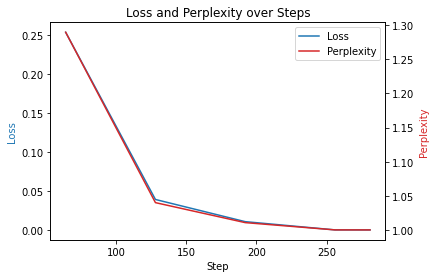

In [28]:
# 图表显示
trainer.show()

从上图来看，发布loss 最低的 step 最为合适

In [31]:
"""
from qianfan.model import Model

m = Model(job_id=trainer_output["job_id"], task_id=trainer_output['task_id'], step=231)
m.publish(name="zuowenebp2")
"""

'\nfrom qianfan.model import Model\n\nm = Model(job_id=trainer_output["job_id"], task_id=trainer_output[\'task_id\'], step=231)\nm.publish(name="zuowenebp2")\n'

### 2.5.2 精调完成

至此我们完成了一轮针对ERNIE-Speed的训练，并把完成了模型的发布，以进行下一轮的评估操作

我们基于以上的训练过程，我们在ERNIE Speed模型上共计做了5组SFT实验，参数和训练方法配置如下：



| **训练方法**      | LoRA | LoRA |  全量更新 |   全量更新 | 全量更新 |
| ----------------- | --------------- | ---------------- | -------------------- | -------------------- | -------------------- |
| **Epoch**         | 3                | 10                | 3                    | 10                   | 20 |
| **Learning Rate** | 3e-5             | 3e-5             | 3e-5                 | 3e-5                 | 3e-5 |  
| **loss**         |  ![lora_e3](./img/lora_epoch3.png) | ![lora_e10](./img/lora_epoch10.png)                | ![all_e3](./img/all_epoch3.png)                    |  ![all_e10](./img/all_epoch10.png)                    |  ![all_e20](./img/all_epoch20.png)  |

对于实验1和2两个使用LoRA训练方法的训练，Epoch等于3和10都发现Loss曲线收敛不够明显。

对于实验3至5，我们使用全量更新训练方法，该训练方法下Loss曲线有明显收敛，Loss值不断降低。类似该种情况，我们建议增加Epoch数量进行训练，查看Loss指标的变化情况。

但同时，我们可以很好的发现，对于实验5，我们使用全量更新训练方法，Epoch增加至20，我们发现Loss曲线已经接近0，可以判定为*曲线过拟合*。一般出现过拟合，应该在过拟合之前停止实验。

因此，我们尝试将Epoch调整为10，Learning Rate保持在3e-5。发现Loss曲线不断降低，接近于0。初步判断该实验效果会更好。
（当前也可以借由SDK的step发布能力选择在过拟合前的checkpoint进行发布）


## 2.6 模型评估

在训练完成之后，我们还需要对微调后的模型进行效果评估，以确定模型是否已经收敛且能实现我们所期望的效果。

在第一章中我们已经使用过这个评估器了，简单来说我们选择实现一个基于规则的自定义评估器，来评估微调后的模型是否有遵循我们的输出格式，以及各项评估指标，大模型输出和预期输出之间的差距。

In [29]:
from qianfan.evaluation import EvaluationManager
from qianfan.model import Model

# 首先定义EvaluationManager，引入本地评估器
em = EvaluationManager(local_evaluators=[local_evaluator])
# 这一步骤会使用模型进行批量推理，再对批量推理的结果进行批量评估
# eval_result = em.eval([m], qf_eval_ds)

除了一步完成所有的批量评估和推理之外，还可以分别使用`Model.batch_inference`对模型做批量推理，然后使用`eval_only`对其结果做评估：

> 其余批量推理的方法请参考 [官方cookbook](https://github.com/baidubce/bce-qianfan-sdk/blob/main/cookbook/batch_prediction.ipynb)

In [30]:
# 为了展示，我们直接加载批量评估的结果集合进行评估：
# eval_infer_result = m.batch_inference(qf_eval_ds)
eval_infer_result = Dataset.load(data_file="./data/eval_only_ds.json")

# 设置用于评估的column：
eval_infer_result.eval_input_column = "input_prompt"
eval_infer_result.eval_llm_output_column = "llm_output"
eval_infer_result.reference_column = "expected_output"
eval_result=em.eval_only(eval_infer_result)

# 展示评估 metrics 信息
import json
print(json.dumps(eval_result.metrics, ensure_ascii=False))

[INFO] [04-16 13:00:02] dataset.py:408 [t:8211643072]: no data source was provided, construct
[INFO] [04-16 13:00:02] dataset.py:276 [t:8211643072]: construct a file data source from path: ./data/eval_only_ds.json, with args: {}
[INFO] [04-16 13:00:02] file.py:280 [t:8211643072]: use format type FormatType.Json
[INFO] [04-16 13:00:02] utils.py:347 [t:8211643072]: start to get memory_map from /Users/shikuan/.qianfan_cache/dataset/Users/shikuan/github/bce-qianfan-sdk/cookbook/awesome_demo/essay_scoring/data/eval_only_ds.arrow
[INFO] [04-16 13:00:02] utils.py:275 [t:8211643072]: has got a memory-mapped table


可以看到，评估得到的模型，在回答的稳定性上，较之前的基础模型有所提升，且打分结果更贴近人工打分的结果。

我们还可以将评估的结果数据集保存到本地，方便我们进行进一步的分析

比如说，我们可以将各项指标分差进行汇总计算，最后使用可视化的方式进行展示。

为了使得数据能够有对比，我们还可以使用基础模型的 ERNIE-Speed-8K ，在评估集上也做相同的评估，以佐证我们的训练效果

In [8]:
"""
from tabulate import tabulate

# og_model_eval_result = em.eval([Model(version_id="amv-pzqtzdspm77m")], qf_eval_ds)
sft_model_tag = list(eval_result.metrics.keys())[0]

cmp_dict = {k: [eval_result.metrics[sft_model_tag][k], v] for k, v in list(og_model_eval_result.metrics.values())[0].items()}

print(tabulate(cmp_dict, headers='keys', tablefmt='fancy_grid', showindex=("EB-Speed-SFT", "EB-Speed")))

cmp_entry_dict = {
    "输入的 Prompt": [eval_result.result_dataset[0]["input_prompt"], None, None],
    "预期回答与大模型回答": [eval_result.result_dataset[0]["expected_output"], eval_result.result_dataset[0]["llm_output"], og_model_eval_result.result_dataset[0]["llm_output"]],
}

print(tabulate(cmp_entry_dict, headers='keys', tablefmt='fancy_grid', showindex=("原始数据", "EB-Speed-SFT", "EB-Speed")))
"""

╒══════════════╤════════════════╤════════════════════════╤════════════════════════╤════════════════════════╤══════════════════════╤════════════════════════╤════════════════════════╤══════════════════════╤════════════════════════╤════════════════════════╤══════════════════════╤════════════════════════╤════════════════════════╤══════════════════╤════════════════╤════════════════════════╤════════════════════════╤══════════════════════╤════════════════════╤════════════════════════╤══════════════════════╤════════════════════╤════════════════════════╤══════════════════════╤════════════════════╤══════════════════════╤══════════════════════╤════════════════╤════════════════════════╕
│              │   遵守格式占比 │   总分之和计算正确占比 │   内容评分等级一致占比 │   内容点评相似度平均值 │   内容评分分差平均值 │   表达评分等级一致占比 │   表达点评相似度平均值 │   表达评分分差平均值 │   发展评分等级一致占比 │   发展点评相似度平均值 │   发展评分分差平均值 │   扣分解析相似度平均值 │   扣分项扣分分差平均值 │   总分分差平均值 │   遵守格式方差 │   总分之和计算正确方差 │   内容评分等级一致方差 │   内容点评相似度方差 │   内容评分分差方差 │   表达评分等级一致方差 │   表达点评相似度方差 │   

# 3. 大模型服务部署


In [76]:
from qianfan.model import Service, DeployConfig
from qianfan.model.consts import ServiceType
from qianfan.resources.console.consts import DeployPoolType

sft_svc: Service = m.deploy(DeployConfig(
    name="essay_correct_3",
    endpoint_prefix="essaycor",
    replicas=1,
    pool_type=DeployPoolType.PrivateResource,
    service_type=ServiceType.Chat,
))

[INFO] [04-15 11:11:29] model.py:492 [t:8423316288]: ready to deploy service with model am-bg7n2rn2gsbb/amv-pzqtzdspm77m
[INFO] [04-15 11:11:33] model.py:527 [t:8423316288]: please check web console `https://console.bce.baidu.com/qianfan/ais/console/onlineService`,for service  deployment payment.
[INFO] [04-15 11:12:04] model.py:527 [t:8423316288]: please check web console `https://console.bce.baidu.com/qianfan/ais/console/onlineService`,for service  deployment payment.
[INFO] [04-15 11:12:34] model.py:527 [t:8423316288]: please check web console `https://console.bce.baidu.com/qianfan/ais/console/onlineService`,for service  deployment payment.
[INFO] [04-15 11:13:04] model.py:527 [t:8423316288]: please check web console `https://console.bce.baidu.com/qianfan/ais/console/onlineService`,for service  deployment payment.
[INFO] [04-15 11:13:35] model.py:527 [t:8423316288]: please check web console `https://console.bce.baidu.com/qianfan/ais/console/onlineService`,for service  deployment pay

In [5]:
from qianfan import ChatCompletion

#endpoint = sft_svc.endpoint
endpoint = 'kt7b33wp_test_essay'
correction_prompt = Prompt(template=correction_prompt_template, identifier="{{}}")
bad_essay = {'title': bad_target['question'], 'essay': bad_target['article']}

chat=ChatCompletion(endpoint=endpoint)
result = chat.do([{"content": correction_prompt.render(**bad_essay)[0], "role": "user"}], stream=True)

for s in result:
    print(s['result'])

[WARNING] [04-16 11:28:18] base.py:406 [t:8211643072]: retry is not available when stream is enabled


{"详细
解析": {
    "内容项": {
      "解析": "作文内容基本符合题意，强调了网络带来的便利与可能的问题，但内容
较为表面，没有深入探讨网络对个人生活、思想的影响，内容较为单薄，未能充分展开论述。",
      "等级": "三等",
      
"得分": "8分"
    },
    "表达项": {
      "解析": "文章结构基本完整，语言基本通顺，但
未见特别文采与流畅的语言表达，篇章结构比较单一，未体现出较好的层次感和过渡性。",
      "等级": "三等",
      "
得分": "8分"
    },
    "发展等级": {
      "解析": "文章仅停留在问题的表面阐述，未能提供深刻的见解
或独到的创意，内容和论证较为平庸，未展现出特别的文采。",
      "等级": "三等",
      "得分": "7分"
    
},
    "扣分项和残篇评定": {
      "解析": "作文未见明显的错别字、标点符号错误，字数符合要求，标题设置正确
，故不扣分。",
      "扣分": "0分"
    }
  },
  "缺点和改进意见": {
    "缺点": "文章
整体内容单薄，未深入探讨网络对个人生活、思想的影响；
语言表达缺乏个性化和文采，结构层次不够鲜明，文章整体显得较为平庸。",
    "改进意见": "应当增加具体的生活实例或个人经历
来支撑论点，使文章内容更加充实；
尝试使用更有力度的词汇和修辞手法，来增强文章的表达效果；
文章结构应更加完整与逻辑清晰，使读者能够跟随作者的思路顺畅理解文章的主旨。"
  },
  "最终得分": "23
分"
}


In [ ]:


Dataset.map_reduce